# Техническое задание

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# 8 неделя

In [ ]:
!rm -r sample_data

In [ ]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


In [ ]:
!pip -q install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.1 MB/s eta 0:00:00


In [ ]:
import autokeras as ak

Using TensorFlow backend


In [ ]:
# Установка terra-ai-datasets-framework
%%capture
!pip install terra-ai-datasets-framework

In [ ]:
!pip -q install pydub

In [ ]:
from pydub.utils import mediainfo

## Библиотеки и переменные

In [ ]:
import os            # для работы с операционной системой
import shutil        # для файловых операций
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями

from sklearn.model_selection  import train_test_split
from terra_ai_datasets.create import AudioClassification

from tensorflow.keras.utils   import plot_model
from tensorflow.keras.models  import Model
from tensorflow.keras.layers  import Input, Dense, Dropout, BatchNormalization, Conv1D, Flatten, concatenate

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/'                                 # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                                  # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                                     # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                                      # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                                     # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                              # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'                        # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'                        # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'                        # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'                     # путь к записям звонков проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                             # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                               # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'                     # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                               # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                             # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                               # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'               # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv'          # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv'          # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'                       # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                         # путь к информации о новых звонках проекта Paveletskaya_city
transcription_path         = all_dataset_path      + 'Whisper-транскрибация записей звонков/'       # путь к папке транскрибации новых записей звонков
transcription_new_path     = all_dataset_path      + 'Whisper-транскрибация новых записей звонков/' # путь к папке транскрибации новых записей звонков

## Функции

In [ ]:
def visualize_dataset_shapes(dataset):
  for split in ['train', 'val']:
    print(f'\n--- Выборка {split} ---')
    for i, (inp, arr) in enumerate(dataset.X[split].items(), 1):
      print(f'Вход {i}: {arr.shape}')
    for i, (inp, arr) in enumerate(dataset.Y[split].items(), 1):
      print(f'Выход {i}: {arr.shape}')


def classification_prediction(dataset, model, num_samples=5):
  classes_names = dataset.put_instructions[4]['4_Classification'].parameters.classes_names
  inp, out, pred = next(dataset.evaluate_on_model(model, batch_size=num_samples))

  y_true = np.argmax(out['output_1'].numpy(), axis=1)
  y_pred = np.argmax(pred, axis=1)

  true_count = 0

  for y_tr, y_pr in zip(y_true, y_pred):
    if classes_names[y_pr] == classes_names[y_tr]: true_count += 1

  print(f"Процент распознавания: {true_count/num_samples:.2%}")

## Подбор архитектур нейронных сетей

### Классификация аудио

#### Подготовка датасета

##### Разделение аудиозаписей на обучающие и тестовые

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [ ]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(1845, 79)
(4531, 79)
(460, 79)
(1132, 79)


In [ ]:
# Создаём папки для аудио датасета
os.makedirs(work_dir_path + 'AudioClassification', exist_ok=True)
os.makedirs(work_dir_path + 'AudioClassification/train', exist_ok=True)
os.makedirs(work_dir_path + 'AudioClassification/test', exist_ok=True)
os.makedirs(work_dir_path + 'AudioClassification/train/Целевой', exist_ok=True)
os.makedirs(work_dir_path + 'AudioClassification/train/Нецелевой', exist_ok=True)
os.makedirs(work_dir_path + 'AudioClassification/test/Целевой', exist_ok=True)
os.makedirs(work_dir_path + 'AudioClassification/test/Нецелевой', exist_ok=True)

In [ ]:
# Копируем файлы записей звонков в соответствующие папки
for call in total_targets_train_df['Файл записи звонка'].values:
  shutil.copy(all_dataset_path + call, work_dir_path + 'AudioClassification/train/Целевой')
for call in total_not_targets_train_df['Файл записи звонка'].values:
  shutil.copy(all_dataset_path + call, work_dir_path + 'AudioClassification/train/Нецелевой')
for call in total_targets_test_df['Файл записи звонка'].values:
  shutil.copy(all_dataset_path + call, work_dir_path + 'AudioClassification/test/Целевой')
for call in total_not_targets_test_df['Файл записи звонка'].values:
  shutil.copy(all_dataset_path + call, work_dir_path + 'AudioClassification/test/Нецелевой')

##### `terra_ai_datasets`

###### `sample_rate`

In [ ]:
info = mediainfo(work_dir_path + 'AudioClassification/train/Целевой/' + os.listdir(work_dir_path + 'AudioClassification/train/Целевой')[0])
print(info['sample_rate'])
print(info['channels'])


8000
2


###### `dataset`

In [ ]:
dataset = AudioClassification(source_path=[work_dir_path + 'AudioClassification/train'],
                              train_size=0.8,
                              sample_rate=8000,
                              parameter=['Audio signal', 'MFCC', 'RMS'],
                              fill_mode='Loop',
                              resample='Scipy',
                              preprocessing='StandardScaler',
                              mode='Full',
                              max_seconds=5,
                              one_hot_encoding=True)

11:25:51 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
dataset.visualize()

Класс: Целевой
Файл: /content/drive/MyDrive/media108.ru/AudioClassification/train/Целевой/2023-06-10_09-54-28.249444_from_79009523902_to_0197877_session_2996660085_talk.mp3
Отрезок: 0:5.0



Класс: Нецелевой
Файл: /content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-06_11-35-51.251903_from_74951626925_to_0188880_session_3071594552_talk.mp3
Отрезок: 0:5.0


In [ ]:
dataset.summary()

,1_Audio,2_Audio,3_Audio,4_Classification
0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-06-05_17-21-22.592763_from_79854355838_to_0173695_session_2985798471_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-06-05_17-21-22.592763_from_79854355838_to_0173695_session_2985798471_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-06-05_17-21-22.592763_from_79854355838_to_0173695_session_2985798471_talk.mp3;0:5.0,Нецелевой
1,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-12_17-46-35.551142_from_79168868797_to_74955141111_session_3091696945_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-12_17-46-35.551142_from_79168868797_to_74955141111_session_3091696945_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-12_17-46-35.551142_from_79168868797_to_74955141111_session_3091696945_talk.mp3;0:5.0,Нецелевой
2,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-09-16_18-43-21.937780_from_74950326372_to_00288_session_3228283784_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-09-16_18-43-21.937780_from_74950326372_to_00288_session_3228283784_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-09-16_18-43-21.937780_from_74950326372_to_00288_session_3228283784_talk.mp3;0:5.0,Нецелевой
3,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-05-31_14-23-18.946901_from_79060335507_to_74959339929_session_2975490471_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-05-31_14-23-18.946901_from_79060335507_to_74959339929_session_2975490471_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-05-31_14-23-18.946901_from_79060335507_to_74959339929_session_2975490471_talk.mp3;0:5.0,Нецелевой
4,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-15_16-33-29.148058_from_79963079378_to_74955141111_session_3090409586_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-15_16-33-29.148058_from_79963079378_to_74955141111_session_3090409586_talk.mp3;0:5.0,/content/drive/MyDrive/media108.ru/AudioClassification/train/Нецелевой/2023-07-15_16-33-29.148058_from_79963079378_to_74955141111_session_3090409586_talk.mp3;0:5.0,Нецелевой



Кол-во примеров в train выборке: 5100
Кол-во примеров в val выборке: 1276

Список классов и количество примеров:


,Целевой,Нецелевой
train,1514,3586
val,331,945


In [ ]:
dataset.create()

11:26:20 | Формирование массивов train - Audio - 1_Audio: 100%|██████████| 5100/5100 [00:54<00:00, 93.97it/s] 
11:27:19 | Формирование массивов train - Audio - 2_Audio: 100%|██████████| 5100/5100 [02:18<00:00, 36.80it/s]
11:29:38 | Формирование массивов train - Audio - 3_Audio: 100%|██████████| 5100/5100 [01:08<00:00, 73.93it/s]
11:30:47 | Формирование массивов train - Classification - 4_Classification: 100%|██████████| 5100/5100 [00:00<00:00, 7011.74it/s]
11:30:50 | Формирование массивов val - Audio - 1_Audio: 100%|██████████| 1276/1276 [00:08<00:00, 148.50it/s]
11:30:59 | Формирование массивов val - Audio - 2_Audio: 100%|██████████| 1276/1276 [00:32<00:00, 38.68it/s]
11:31:32 | Формирование массивов val - Audio - 3_Audio: 100%|██████████| 1276/1276 [00:15<00:00, 83.07it/s]
11:31:47 | Формирование массивов val - Classification - 4_Classification: 100%|██████████| 1276/1276 [00:00<00:00, 11697.80it/s]


In [ ]:
visualize_dataset_shapes(dataset)


--- Выборка train ---
Вход 1: (5100, 40000)
Вход 2: (5100, 79, 20)
Вход 3: (5100, 79)
Выход 1: (5100, 2)

--- Выборка val ---
Вход 1: (1276, 40000)
Вход 2: (1276, 79, 20)
Вход 3: (1276, 79)
Выход 1: (1276, 2)


#### Модель нейронной сети

In [ ]:
visualize_dataset_shapes(dataset)


--- Выборка train ---
Вход 1: (5100, 40000)
Вход 2: (5100, 79, 20)
Вход 3: (5100, 79)
Выход 1: (5100, 2)

--- Выборка val ---
Вход 1: (1276, 40000)
Вход 2: (1276, 79, 20)
Вход 3: (1276, 79)
Выход 1: (1276, 2)


In [ ]:
input_1 = Input((40000,), name='input_1')
x1 = Dense(256, activation='relu')(input_1)
x1 = Dropout(0.25)(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dropout(0.25)(x1)
x1 = BatchNormalization()(x1)

input_2 = Input((79,20), name='input_2')
x2 = Conv1D(3, 3, padding='same', activation='relu')(input_2)
x2 = Conv1D(3, 3, padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
x2 = BatchNormalization()(x2)
x2 = Dense(32, activation='relu')(x2)

input_3 = Input((79,), name='input_3')
x3 = Dense(128, activation='relu')(input_3)
x3 = Dropout(0.25)(x3)
x3 = BatchNormalization()(x3)
x3 = Dense(32, activation = 'relu')(x3)
x3 = Dropout(0.25)(x3)
x3 = BatchNormalization()(x3)

x = concatenate([x1, x2, x3])

x = Dense(32, activation='relu')(x)
x = Dense(2, activation='softmax', name='output_1')(x)

model = Model((input_1, input_2, input_3), x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

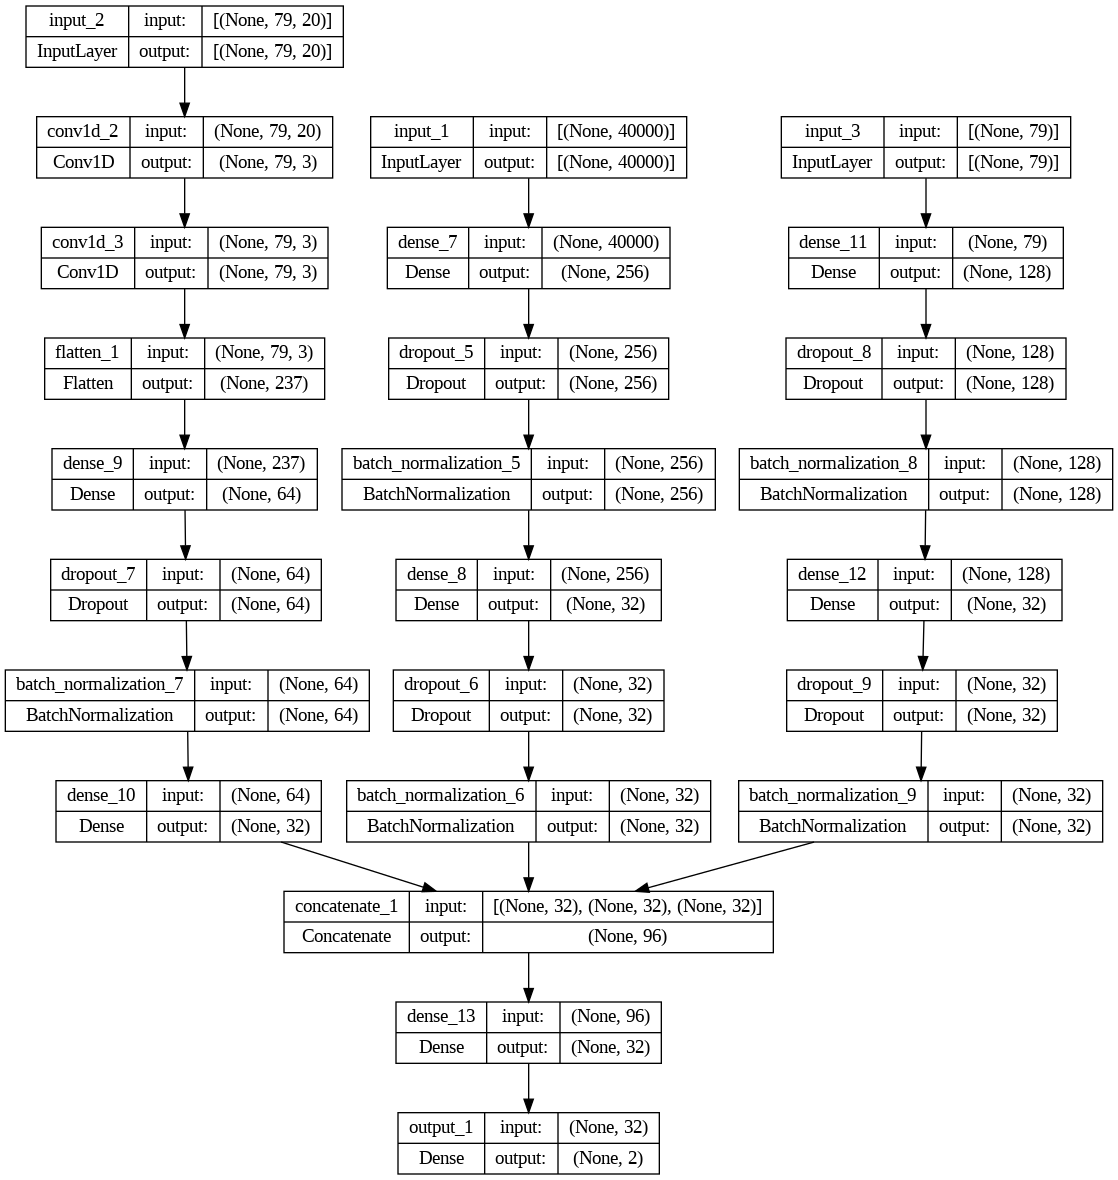

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.fit(dataset.dataset['train'].batch(128),
          epochs=35,
          validation_data=dataset.dataset['val'].batch(128),
          verbose=1)

Epoch 1/35
40/40 [==============================] - 15s 359ms/step - loss: 0.1054 - accuracy: 0.9535 - val_loss: 1.1462 - val_accuracy: 0.6818
Epoch 2/35
40/40 [==============================] - 14s 353ms/step - loss: 0.1061 - accuracy: 0.9527 - val_loss: 1.1629 - val_accuracy: 0.6912
Epoch 3/35
40/40 [==============================] - 14s 341ms/step - loss: 0.1056 - accuracy: 0.9549 - val_loss: 1.1714 - val_accuracy: 0.6810
Epoch 4/35
40/40 [==============================] - 14s 342ms/step - loss: 0.1016 - accuracy: 0.9549 - val_loss: 1.1875 - val_accuracy: 0.6881
Epoch 5/35
40/40 [==============================] - 14s 343ms/step - loss: 0.0996 - accuracy: 0.9504 - val_loss: 1.1462 - val_accuracy: 0.6818
Epoch 6/35
40/40 [==============================] - 12s 311ms/step - loss: 0.0942 - accuracy: 0.9569 - val_loss: 1.1313 - val_accuracy: 0.6716
Epoch 7/35
40/40 [==============================] - 13s 325ms/step - loss: 0.0937 - accuracy: 0.9580 - val_loss: 1.1679 - val_accuracy: 0.6803

In [ ]:
classification_prediction(dataset, model, 1276)

40/40 [==============================] - 1s 30ms/step
Процент распознавания: 67.95%
